In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
tf=pd.read_csv('http://humantfs.ccbr.utoronto.ca/download/v_1.01/TF_names_v_1.01.txt',index_col=0,header=None).index

In [2]:
#! rm -rf cache
adata=sc.read_10x_mtx('liu',cache=True,prefix='hrpiSC_')
adata

AnnData object with n_obs × n_vars = 7194 × 12246
    var: 'gene_ids', 'feature_types'

In [3]:
df=adata.to_df()

In [4]:
mir=df.columns[df.columns.str.startswith('MIR')]

In [5]:
df[mir].sum().sort_values()

MIR155HG          349.0
MIR1915HG         370.0
MIR181A1HG        371.0
MIR22HG           738.0
MIR762HG          765.0
MIR503HG          915.0
MIR210HG          917.0
MIR222HG          982.0
MIRLET7BHG       1437.0
MIR205HG         2030.0
MIR99AHG         3326.0
MIR4458HG        7942.0
MIR4435-2HG      9196.0
MIR302CHG      142568.0
dtype: float32

In [6]:
yam=['NANOG','POU5F1','SOX2','LIN28A','KLF4','MYC','MIR302CHG']
df[yam].corr()

,NANOG,POU5F1,SOX2,LIN28A,KLF4,MYC,MIR302CHG
NANOG,1.000000,0.511575,0.242609,0.428324,0.058037,0.034283,0.369836
POU5F1,0.511575,1.000000,0.426286,0.697707,0.044122,0.132713,0.484640
SOX2,0.242609,0.426286,1.000000,0.525542,-0.010971,0.143025,0.398700
LIN28A,0.428324,0.697707,0.525542,1.000000,0.015538,0.183289,0.591211
KLF4,0.058037,0.044122,-0.010971,0.015538,1.000000,-0.012651,0.005641
MYC,0.034283,0.132713,0.143025,0.183289,-0.012651,1.000000,0.104051
MIR302CHG,0.369836,0.484640,0.398700,0.591211,0.005641,0.104051,1.000000


<AxesSubplot:xlabel='MIR302CHG', ylabel='POU5F1'>

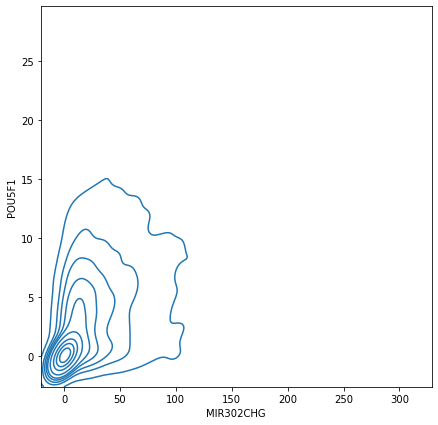

In [7]:
x='VIM'
x='MIR302CHG'
y='POU5F1'
f, ax = plt.subplots(figsize=(7, 7))
#ax.set(xscale="log", yscale="log")
sns.kdeplot(data=df[[x,y]],x=x,y=y,ax=ax)

In [8]:
tfmir=tf.append(mir)
dg=df[df.columns.intersection(tfmir)].T

In [9]:
adata = sc.AnnData(dg)
adata

AnnData object with n_obs × n_vars = 990 × 7194

In [10]:
#sc.pp.log1p(adata)
#sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
adata

AnnData object with n_obs × n_vars = 990 × 7194
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [11]:
adata.obs['gene']=adata.obs.index
adata.obs.loc[~adata.obs.gene.isin(yam),'gene']='other'

... storing 'gene' as categorical


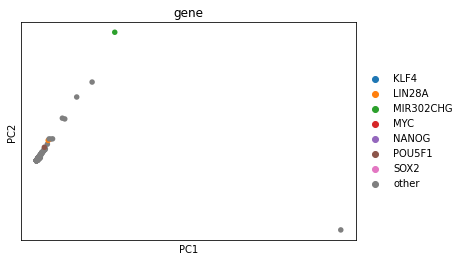

In [12]:
sc.pl.pca(adata,color='gene')

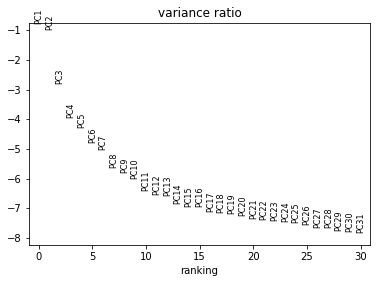

In [13]:
sc.pl.pca_variance_ratio(adata, log=True)

In [14]:
pd.DataFrame(adata.obsm['X_pca']).sort_values(0)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
718,-17.261024,-26.413473,11.341889,1.131799,-4.324292,4.486907,-1.063312,-0.425008,0.513351,-1.558510,...,-0.717959,0.045207,-0.685592,0.095827,-0.390612,0.273282,-0.820005,0.365374,0.148842,-0.466263
10,-17.159672,-26.095787,10.371094,-0.015101,-1.608628,1.386592,-1.346092,0.733904,-1.879525,-2.071468,...,0.173307,-0.626068,-0.759235,0.482751,-0.378310,-0.011045,-0.642280,-0.050385,0.127562,-0.271676
759,-17.152168,-26.060396,10.853490,0.449736,-5.682617,5.408255,-1.494951,-0.128067,0.012663,-1.841917,...,-0.084823,0.095718,-0.359232,-0.157838,-0.505007,0.233263,-0.938075,0.419357,0.034947,-0.532474
463,-17.124949,-26.080873,9.972726,0.165500,-3.622157,3.409945,-1.703295,-0.443168,-0.425277,-2.170738,...,0.172817,-0.193257,-0.073087,0.405275,-0.293770,0.164217,-0.172281,-0.209567,0.201306,-0.130030
311,-17.119858,-25.967730,11.841226,1.547370,-4.644560,5.549180,-0.031547,-0.654045,-0.412588,-1.820883,...,-0.650119,0.052218,-0.188126,-0.004665,-0.225885,0.175109,0.232075,0.029955,-0.250763,-0.372029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,370.189941,841.450989,-413.774048,-76.718430,-330.528046,-131.951675,186.051529,176.902466,92.651489,-127.524254,...,-0.997201,-1.340001,1.516209,-0.233628,-0.899189,-0.498059,-0.527991,0.965289,-2.127654,0.306159
376,533.382935,1296.209229,-321.101166,470.709869,-48.965569,-211.297058,-189.706696,-170.070068,20.743536,-102.393951,...,0.387548,-1.556519,0.823444,-0.216217,-0.206822,0.189876,-0.784109,-1.184407,1.211222,1.381205
46,744.010437,1606.373047,-877.022949,-286.699280,-65.001633,302.418579,-127.585831,-29.774015,-81.058502,37.141678,...,-0.754924,1.071965,-0.219190,0.160649,-1.308963,0.422337,-1.606565,0.157675,0.101497,-1.320446
965,1053.629517,2639.365723,1098.145142,-233.239655,5.020280,-28.433960,-8.513517,-4.498197,0.627182,3.345882,...,0.634193,0.198042,-0.072736,0.115006,-0.388032,-0.101326,0.142116,0.112233,-0.081321,0.024451


In [15]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [16]:
sc.tl.umap(adata)

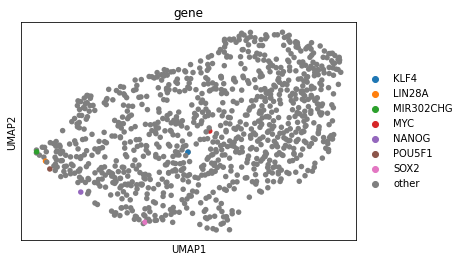

In [17]:
sc.pl.umap(adata,color='gene')

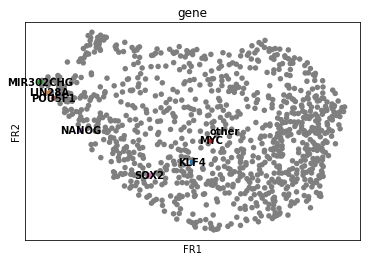

In [18]:
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, color='gene', legend_loc='on data')

In [19]:
sc.tl.leiden(adata, resolution=1.0)

In [20]:
sc.tl.paga(adata, groups='leiden')

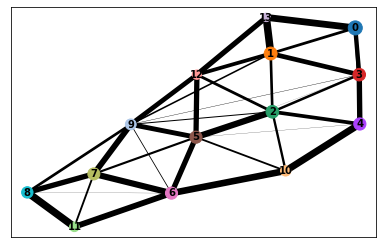

In [22]:
sc.pl.paga(adata, color=['leiden'])

In [29]:
!pip install fa2

     |████████████████████████████████| 435 kB 9.1 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/mahdi/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/b5/tph2y9y902q7527qdwgwmxn40000gn/T/pip-install-k6we17ht/fa2/setup.py'"'"'; __file__='"'"'/private/var/folders/b5/tph2y9y902q7527qdwgwmxn40000gn/T/pip-install-k6we17ht/fa2/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/b5/tph2y9y902q7527qdwgwmxn40000gn/T/pip-wheel-y4l9jcbz
       cwd: /private/var/folders/b5/tph2y9y902q7527qdwgwmxn40000gn/T/pip-install-k6we17ht/fa2/
  Complete output (34 lines):
  Installing fa2 package (fastest forceatlas2 python implementation)
  
  >>>> Cython is installed?
  Yes
  
  >>>> Starting to install!
  
  running bdist_wheel
  running build
  running b

In [23]:
sc.tl.draw_graph(adata, init_pos='paga')

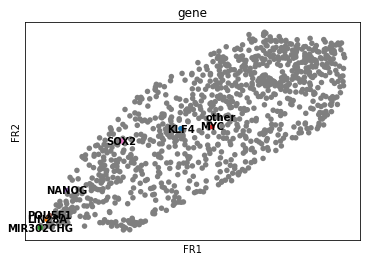

In [28]:
sc.pl.draw_graph(adata,color='gene',legend_loc='on data')